# Импорт библиотек

In [156]:
import sys
import os
from tqdm import tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import librosa
import librosa.display

from IPython import display 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import  keras
from keras import layers
from keras.models import Sequential
from keras.utils import to_categorical

In [157]:
sys.path.append('D:/Programming/Python')

In [158]:
from ml_tools import training_plot

In [159]:
data_path = fr'datas/'

In [160]:
slice_file_name = []
labels = []
full_path = []
for fold in os.listdir(data_path):
    curent_folder = os.path.join(data_path, fold)
    for file in os.listdir(curent_folder):
        current_file = os.path.join(curent_folder, file)
        full_path.append(current_file)
        labels.append(fold)
        slice_file_name.append(file)

In [161]:
print(slice_file_name)

['alice (1).wav', 'alice (2).wav', 'alice (3).wav', 'alice (4).wav', 'alice (5).wav', 'alice (6).wav', 'alice (7).wav', 'alice (8).wav', 'alice (9).wav', 'alice (10).wav', 'alice (11).wav', 'alice (12).wav', 'alice (13).wav', 'alice (14).wav', 'alice (15).wav', 'alice (16).wav', 'alice (17).wav', 'alice (18).wav', 'alice (19).wav', 'alice (20).wav', 'alice (21).wav', 'alice (22).wav', 'alice (23).wav', 'alice (24).wav', 'alice (25).wav', 'alice (26).wav', 'alice (27).wav', 'alice (28).wav', 'alice (29).wav', 'alice (30).wav', 'alice (31).wav', 'alice (32).wav', 'alice (33).wav', 'alice (34).wav', 'alice (35).wav', 'alice (36).wav', 'alice (37).wav', 'alice (38).wav', 'alice (39).wav', 'alice (40).wav', 'alice (41).wav', 'alice (42).wav', 'alice (43).wav', 'alice (44).wav', 'alice (45).wav', 'alice (46).wav', 'alice (47).wav', 'alice (48).wav', 'alice (49).wav', 'alice (50).wav', 'alice (51).wav', 'alice (52).wav', 'alice (53).wav', 'alice (54).wav', 'alice (55).wav', 'alice (56).wav', 

In [162]:
print(labels)

['alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'nn_words', 'nn_words', 'nn_words', 'nn_words', 'nn_words', 'nn_words', 'nn_words', 'nn_words', 'nn

In [163]:
print(full_path)

['datas/alice\\alice (1).wav', 'datas/alice\\alice (2).wav', 'datas/alice\\alice (3).wav', 'datas/alice\\alice (4).wav', 'datas/alice\\alice (5).wav', 'datas/alice\\alice (6).wav', 'datas/alice\\alice (7).wav', 'datas/alice\\alice (8).wav', 'datas/alice\\alice (9).wav', 'datas/alice\\alice (10).wav', 'datas/alice\\alice (11).wav', 'datas/alice\\alice (12).wav', 'datas/alice\\alice (13).wav', 'datas/alice\\alice (14).wav', 'datas/alice\\alice (15).wav', 'datas/alice\\alice (16).wav', 'datas/alice\\alice (17).wav', 'datas/alice\\alice (18).wav', 'datas/alice\\alice (19).wav', 'datas/alice\\alice (20).wav', 'datas/alice\\alice (21).wav', 'datas/alice\\alice (22).wav', 'datas/alice\\alice (23).wav', 'datas/alice\\alice (24).wav', 'datas/alice\\alice (25).wav', 'datas/alice\\alice (26).wav', 'datas/alice\\alice (27).wav', 'datas/alice\\alice (28).wav', 'datas/alice\\alice (29).wav', 'datas/alice\\alice (30).wav', 'datas/alice\\alice (31).wav', 'datas/alice\\alice (32).wav', 'datas/alice\\al

In [164]:
data = {
    'slice_file_name': slice_file_name,
    'full_path': full_path,
    'label': labels
}

metadata = pd.DataFrame(data)

In [165]:
metadata

,slice_file_name,full_path,label
0,alice (1).wav,datas/alice\alice (1).wav,alice
1,alice (2).wav,datas/alice\alice (2).wav,alice
2,alice (3).wav,datas/alice\alice (3).wav,alice
3,alice (4).wav,datas/alice\alice (4).wav,alice
4,alice (5).wav,datas/alice\alice (5).wav,alice
...,...,...,...
205,nn_words (106).wav,datas/nn_words\nn_words (106).wav,nn_words
206,nn_words (107).wav,datas/nn_words\nn_words (107).wav,nn_words
207,nn_words (108).wav,datas/nn_words\nn_words (108).wav,nn_words
208,nn_words (109).wav,datas/nn_words\nn_words (109).wav,nn_words


In [166]:
metadata['label'].unique()

array(['alice', 'nn_words'], dtype=object)

In [167]:
metadata['label'].value_counts()

label
nn_words    110
alice       100
Name: count, dtype: int64

In [168]:
def feature_extractor(file_name):
    audio_data, sampling_rate = librosa.load(file_name)
    mfcc_features = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=40)
    scaled_mfcc_features = np.mean(mfcc_features.T, axis=0)
    return scaled_mfcc_features

In [169]:
extracted_features = []

for i, row in tqdm(metadata.iterrows()):
    data = feature_extractor(row['full_path'])
    label = row['label']
    extracted_features.append([data, label])

210it [00:01, 182.18it/s]


In [170]:
extracted_features = pd.DataFrame(extracted_features, columns=['data', 'class'])
extracted_features

,data,class
0,"[-400.79553, 74.309944, -3.0257087, 11.651106,...",alice
1,"[-382.26035, 85.384636, -17.302206, -0.3292803...",alice
2,"[-389.47098, 74.79269, -11.779481, 10.773905, ...",alice
3,"[-406.98474, 80.29856, 12.604051, 9.95078, -6....",alice
4,"[-406.12943, 83.07943, -5.3966703, 1.3668624, ...",alice
...,...,...
205,"[-409.7457, 96.4879, -2.4802258, 45.11258, 19....",nn_words
206,"[-466.59955, 90.2987, 0.32288378, 20.807518, -...",nn_words
207,"[-420.3043, 154.19917, -20.681416, 10.442875, ...",nn_words
208,"[-461.48602, 106.35578, -7.605717, 16.831417, ...",nn_words


In [171]:
x = np.array(extracted_features['data'].to_list())
y = np.array(extracted_features['class'].to_list())

In [172]:
x.shape

(210, 40)

In [173]:
le = LabelEncoder()
y = to_categorical(le.fit_transform(y))
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

## Разделение данных на тренировочные и тестовых 

In [174]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [175]:
num_labels = y.shape[1]
num_labels

2

In [176]:
model = Sequential()

model.add(layers.Input(shape=(40,)))

# первый слой
model.add(layers.Dense(100))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

# финальный слой
model.add(layers.Dense(num_labels))
model.add(layers.Activation('softmax'))

In [177]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │           202 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,302 (16.80 KB)

 Trainable params: 4,302 (16.80 KB)

 Non-trainable params: 0 (0.00 B)

In [178]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # используется если классы пересекаются между собой
              metrics=['accuracy', 'mae', 'mse']
              )

In [179]:
epochs = 200
batch_size = 32

callbacks = keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.008, verbose=0)

In [180]:
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/200


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 617ms/step - accuracy: 0.5312 - loss: 26.6770 - mae: 0.4656 - mse: 0.462 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4683 - loss: 27.9108 - mae: 0.5318 - mse: 0.5273 - val_accuracy: 0.2143 - val_loss: 4.9232 - val_mae: 0.7686 - val_mse: 0.7230
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5312 - loss: 30.9421 - mae: 0.4824 - mse: 0.47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4911 - loss: 28.1953 - mae: 0.5099 - mse: 0.5023 - val_accuracy: 0.5714 - val_loss: 8.1177 - val_mae: 0.4299 - val_mse: 0.4286
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5312 - loss: 18.5996 - mae: 0.4821 - mse: 0.47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5091 - loss: 21.7395 - mae: 0.4928 - mse: 0.4820 - val_accuracy: 0.5714 - val_loss: 4.8158 - val_mae: 0.4423 - val_mse: 0.4291
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5000 - loss: 22.4313 - mae: 0.5016 - mse: 0.50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy

In [181]:
test_metrics = model.evaluate(x_test, y_test)
test_metrics = zip(test_metrics, ['loss', 'accuracy', 'mae', 'mse'])
for num, metric in test_metrics:
    print(f'{metric}: {num}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9375 - loss: 0.7302 - mae: 0.0743 - mse: 0.066 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9315 - loss: 1.2918 - mae: 0.0821 - mse: 0.0724 


loss: 1.572630524635315
accuracy: 0.9285714030265808
mae: 0.08594399690628052
mse: 0.07547720521688461


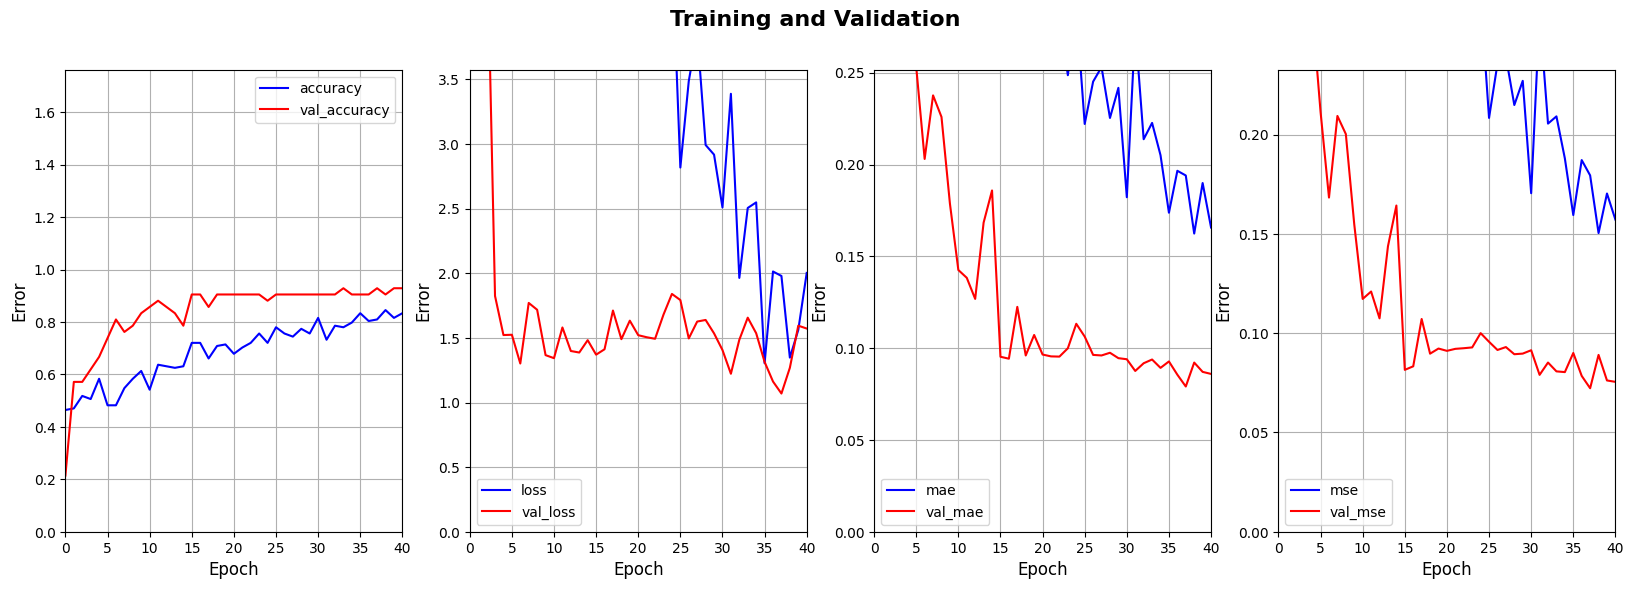

In [182]:
training_plot(history, figsize=(20, 6))

In [183]:
filepath=fr"datas/nn_words/nn_words (2).wav"
features =  feature_extractor(filepath)
features.shape

(40,)

In [184]:
display.Audio(filepath)

In [185]:
features = features.reshape(1, -1)
features.shape

(1, 40)

In [186]:
predict = model.predict(features)
predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/ste ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[1.1281899e-04, 9.9988711e-01]], dtype=float32)

In [187]:
label = np.argmax(predict, axis=1)
res = le.inverse_transform(label)
res[0]

'nn_words'

# Обучение по спектограмме

## Преобразование аудио в 16 бит

In [188]:
os.listdir()

['alice_call.ipynb',
 '.gitignore',
 'datas',
 '.git',
 'datas16bit',
 'datas16bit_mono']

In [189]:
import soundfile

In [190]:
def transform_wav_to_16_bit(data_path:str, export_path:str):
    if not os.path.exists(export_path): os.makedirs(export_path)
    for audio_path in tqdm(os.listdir(data_path)):
        data, samplerate = soundfile.read(data_path + '/' + audio_path)
        soundfile.write(export_path + '/' + audio_path, data, samplerate, subtype='PCM_16')

In [191]:
transform_wav_to_16_bit('datas/alice', 'datas16bit/alice')

100%|██████████| 100/100 [00:00<00:00, 411.21it/s]


In [192]:
transform_wav_to_16_bit('datas/nn_words', 'datas16bit/nn_words')

100%|██████████| 110/110 [00:00<00:00, 328.62it/s]


In [193]:
os.listdir()

['alice_call.ipynb',
 '.gitignore',
 'datas',
 '.git',
 'datas16bit',
 'datas16bit_mono']

In [194]:
os.listdir('datas16bit')

['alice', 'nn_words']

## Преобразование в моноаудио

In [195]:
os.listdir()

['alice_call.ipynb',
 '.gitignore',
 'datas',
 '.git',
 'datas16bit',
 'datas16bit_mono']

In [196]:
from pydub import AudioSegment

In [197]:
def transform_wav_to_mono(data_path:str, export_path:str):
    if not os.path.exists(export_path): os.makedirs(export_path)
    for audio_path in tqdm(os.listdir(data_path)):
        sound = AudioSegment.from_wav(data_path + '/' + audio_path)
        sound = sound.set_channels(1)
        sound.export(export_path + '/' + audio_path, format="wav")

In [198]:
transform_wav_to_mono('datas16bit/alice', 'datas16bit_mono/alice')

100%|██████████| 100/100 [00:00<00:00, 216.51it/s]


In [199]:
transform_wav_to_mono('datas16bit/nn_words', 'datas16bit_mono/nn_words')

100%|██████████| 110/110 [00:00<00:00, 201.58it/s]


In [200]:
os.listdir()

['alice_call.ipynb',
 '.gitignore',
 'datas',
 '.git',
 'datas16bit',
 'datas16bit_mono']

In [201]:
os.listdir('datas16bit_mono')

['alice', 'nn_words']

## Импорт данных

In [202]:
data_path = 'datas16bit_mono'

In [203]:
training_set, validation_set = tf.keras.utils.audio_dataset_from_directory( 
    directory=data_path, 
    batch_size=16, 
    validation_split=0.2, 
    output_sequence_length=128_000, # длина массива данных = t[seconds] * rate[16_000] * num_audio[]
    seed=0, 
    subset='both')

Found 210 files belonging to 2 classes.
Using 168 files for training.
Using 42 files for validation.


In [204]:
label_names = training_set.class_names
print("label names:", label_names)

label names: ['alice', 'nn_words']


## Обработка данных

In [205]:
def decode_audio(audio_binary):
    """переввод звука в массив данных"""
    audio, sampling_rate = tf.audio.decode_wav(contents=audio_binary)
    return audio, sampling_rate

In [206]:
def squeeze(audio, labels):
    '''перевод звука в формат mono'''
    audio = tf.squeeze(audio, axis=-1)
    return audio, labels

In [207]:
def get_spectrogram(waveform): 
    '''Преобразование данных в спектрограмму'''
    spectrogram = tf.signal.stft(waveform, frame_length=255, frame_step=128) 
    spectrogram = tf.abs(spectrogram)
    return spectrogram[..., tf.newaxis]

In [208]:
training_set = training_set.map(squeeze, tf.data.AUTOTUNE)
validation_set = validation_set.map(squeeze, tf.data.AUTOTUNE)

In [209]:
while True:
    folder = np.random.choice(os.listdir(data_path))
    if not os.path.isfile(folder):
        random_audio_path = fr'{data_path}\{folder}\{np.random.choice(os.listdir(data_path + "/" + folder))}'
        break
random_audio_path

'datas16bit_mono\\alice\\alice (25).wav'

In [210]:
display.Audio(random_audio_path)

In [211]:
def get_spectrogram_dataset(dataset):
    dataset = dataset.map(lambda x, y: (get_spectrogram(x), y),
                          num_parallel_calls=tf.data.AUTOTUNE)
    return dataset

In [212]:
train_set = get_spectrogram_dataset(training_set) 
validation_set = get_spectrogram_dataset(validation_set) 
  
val_set = validation_set.take(validation_set.cardinality() // 2) 
test_set = validation_set.skip(validation_set.cardinality() // 2)

In [213]:
train_set_shape = train_set.element_spec[0].shape 
val_set_shape = val_set.element_spec[0].shape 
test_set_shape = test_set.element_spec[0].shape 
  
print("Train set shape:", train_set_shape) 
print("Validation set shape:", val_set_shape) 
print("Testing set shape:", test_set_shape)

Train set shape: (None, 999, 129, 1)
Validation set shape: (None, 999, 129, 1)
Testing set shape: (None, 999, 129, 1)


In [214]:
input_shape = next(iter(train_set))[0][0].shape 
print("Input shape:", input_shape) 
num_labels = len(label_names)

Input shape: (999, 129, 1)


## Построение модели

In [215]:
model = tf.keras.Sequential([ 
        tf.keras.layers.Input(shape=input_shape), 

        tf.keras.layers.Resizing(64, 64), 
        tf.keras.layers.Normalization(), 
          
        tf.keras.layers.Conv2D(64, 3, activation='relu'),  
        tf.keras.layers.MaxPooling2D(), 
        tf.keras.layers.Dropout(0.5), 
        tf.keras.layers.Flatten(), 
          
        tf.keras.layers.Dense(num_labels, activation='softmax')
])

In [216]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing_1 (Resizing)           │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_1 (Normalization) │ (None, 64, 64, 1)      │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │       123,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,653 (483.02 KB)

 Trainable params: 123,650 (483.01 KB)

 Non-trainable params: 3 (16.00 B)

In [217]:
model.compile( 
    optimizer=tf.keras.optimizers.Adam(), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'] 
)

In [218]:
epochs = 10
verbose = True

monitor = 'loss'
min_delta = 0.01
patience = 4

callbacks = [tf.keras.callbacks.EarlyStopping(monitor=monitor, min_delta=min_delta, patience=patience, verbose=verbose)]

In [219]:
history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 911ms/step - accuracy: 0.6250 - loss: 0.66 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5638 - loss: 0.6749 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6034 - loss: 0.650 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6518 - loss: 0.6127 - val_accuracy: 0.7500 - val_loss: 0.5064
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - accuracy: 0.8750 - loss: 0.36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8507 - loss: 0.3766 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8462 - loss: 0.3764 - val_accuracy: 0.6875 - val_loss: 0.5040
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - accuracy: 0.7500 - loss: 0.31 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8008 - loss: 0.3060 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8172 - loss: 0.312 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8302 - loss: 0.306 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8366 - loss: 0.3021 - val_accuracy: 0.7500 - val_loss: 0.4144
Epoch 4/10
11

## Оценка обучения модели

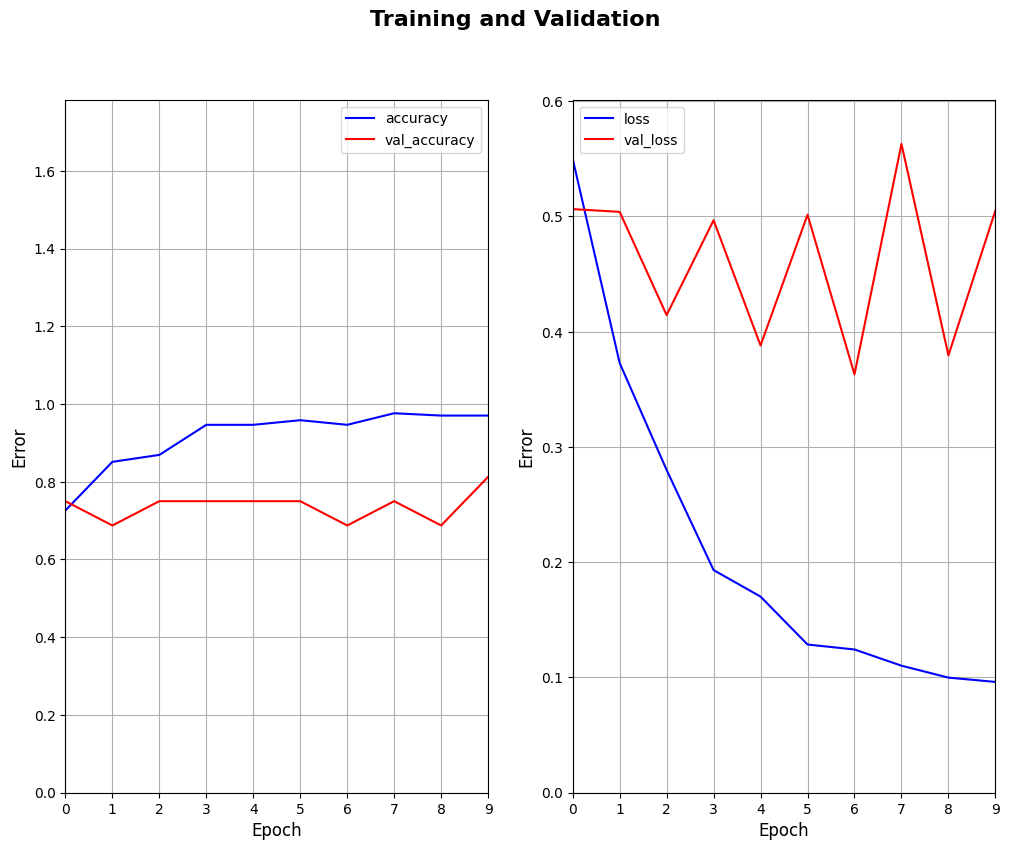

In [220]:
training_plot(history)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step 


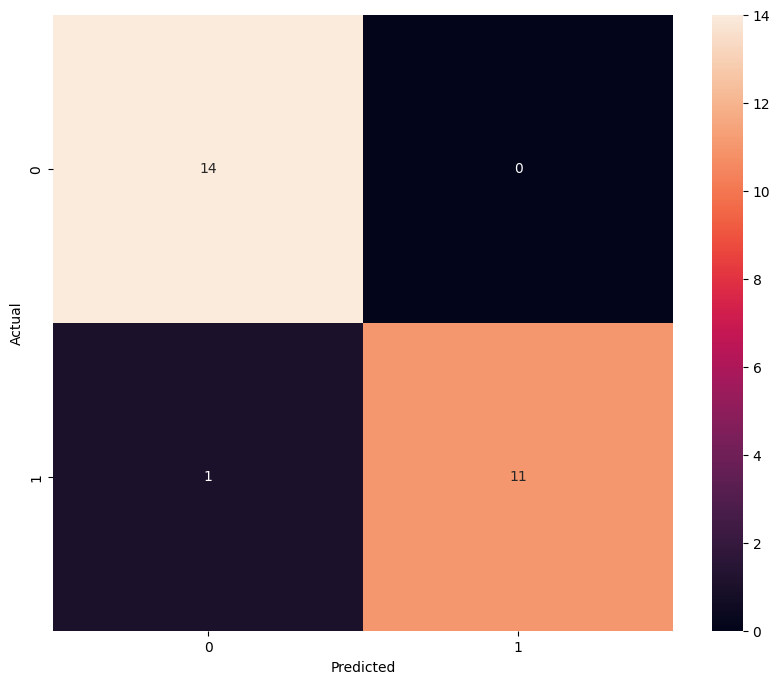

In [221]:
y_pred = np.argmax(model.predict(test_set), axis=1) 
y_true = np.concatenate([y for x, y in test_set], axis=0) 
cm = tf.math.confusion_matrix(y_true, y_pred) 
  
# Plotting the confusion matrix 
plt.figure(figsize=(10, 8)) 
sns.heatmap(cm, annot=True, fmt='g') 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show()

In [222]:
report = metrics.classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        12

    accuracy                           0.96        26
   macro avg       0.97      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26



## Тестирование

In [223]:
while True:
    folder = np.random.choice(os.listdir(data_path))
    if not os.path.isfile(folder):
        random_audio_path = fr'{data_path}\{folder}\{np.random.choice(os.listdir(data_path + "/" + folder))}'
        break
random_audio_path

'datas16bit_mono\\nn_words\\nn_words (21).wav'

In [224]:
Input = tf.io.read_file(str(random_audio_path)) 
x, sample_rate = tf.audio.decode_wav(Input, desired_channels=1, desired_samples=128000,) 
audio, labels = squeeze(x, 'yes')

In [225]:
waveform = audio 
display.Audio(waveform, rate=44_000)

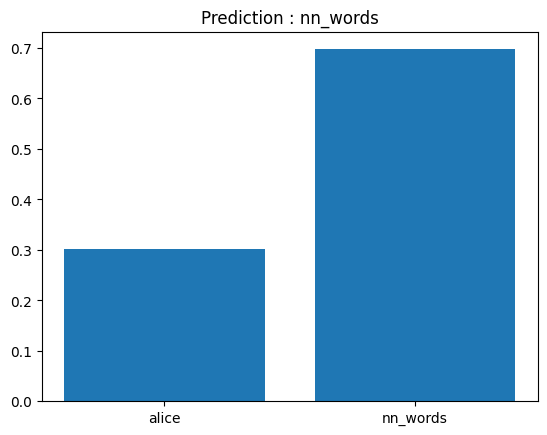

In [226]:
x = get_spectrogram(audio) 
x = tf.expand_dims(x, axis=0) 
  
prediction = model(x) 
plt.bar(label_names, tf.nn.softmax(prediction[0])) 
plt.title('Prediction : '+label_names[np.argmax(prediction, axis=1).item()]) 
plt.show()